## Zadanie

Wylosuj próbkę 1000-elementową z rozkładu normalnego za pomocą metody odrzucania.
  http://staff.iiar.pwr.wroc.pl/grzegorz.mzyk/kmi/kmi03.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import preprocessing
from scipy import stats
%matplotlib inline
res = []
norm = stats.norm(0,1)
while len(res) < 1000:
    p = (np.random.uniform(-3,3), np.random.uniform(0,1))
    if p[1] < norm.pdf(p[0]):
        res.append(p)
        



## Zadanie
Narysuj gęstość rozkładu Split normal distribution (1d) http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf
z różnymi parametrami:

  * $m=0$, $\sigma=1$, $\tau=1$
  * $m=0$, $\sigma=2$, $\tau=1$
  * $m=0$, $\sigma=1$, $\tau=2$
  * $m=2$, $\sigma=1$, $\tau=2$  

In [34]:
a = np.array([1,2])
print(3*a)

[3 6]


0.398942280401


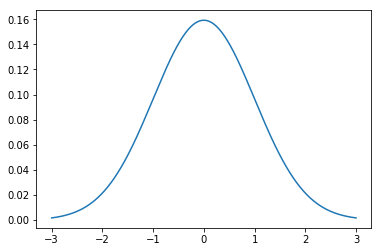

0.199471140201


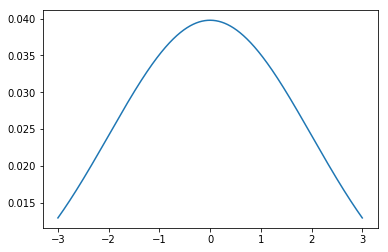

0.265961520268


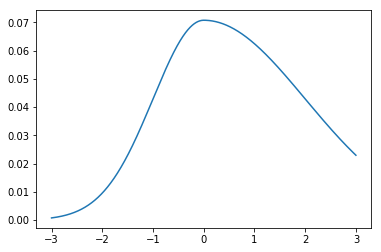

0.265961520268


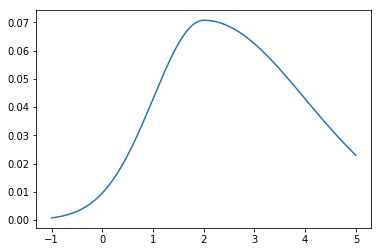

In [3]:
def plot_split_norm(m, sigma, t):
    x1 = np.linspace(m-3, m, num=1000)
    x2 = np.linspace(m, m+3, num=1000)
    c = np.sqrt(2/np.pi)*(1/sigma)*(1/(1+t))
    n1 = lambda x: c*np.exp(-(1/(2*sigma**2))*(x-m)**2)
    n2 = lambda x: c*np.exp(-(1/(2*sigma**2*t**2))*(x-m)**2)
    print(c)
    X = np.concatenate((x1,x2), axis=0)
    Y = np.concatenate((c*np.vectorize(n1)(x1),c*np.vectorize(n2)(x2)), axis=0)
    plt.plot(X, Y)
    plt.show()

plot_split_norm(0,1,1)
plot_split_norm(0,2,1)
plot_split_norm(0,1,2)
plot_split_norm(2,1,2)

## Zadanie
Wylosuj próbkę 1000-elementową z rozkładu normalnego Split normal distribution (1d) z różnymi parametrami za pomocą metody odrzucania.

In [13]:
def split_norm(m, s, t):
    def f(x):
        c = np.sqrt(2/np.pi)*(1/s)*(1/(1+t))
        if x<m:
            return c*np.exp(-(1/(2*s**2))*(x-m)**2)
        else:
            return c*np.exp(-(1/(2*s**2*t**2))*(x-m)**2)
    return f


def get_split_norm(m, s, t, n):
    res = []
    split_pdf = split_norm(m, s, t)
    while len(res) < n:
        p = (np.random.uniform(-3,3), np.random.uniform(0,1))
        if p[1] < split_pdf(p[0]):
            res.append(p)
    return res
get_split_norm(0, 1, 2, 1000)

[(0.12269495059133728, 0.18248716142251498),
 (-0.7343610775293845, 0.1581133115432447),
 (-1.1916952144378348, 0.069056288084546),
 (1.5318282639988299, 0.09948628254255965),
 (-0.1398157843334369, 0.0045140817513782405),
 (1.1686497908678408, 0.18622543632847144),
 (1.1642912926638154, 0.02389525251790292),
 (-0.6315097821023707, 0.09410351489089841),
 (2.243654081048894, 0.13755653746738594),
 (0.8233821897549687, 0.16729127631262064),
 (0.8816379742743274, 0.18938339352165712),
 (0.4274773014583313, 0.239383666066606),
 (-0.5262309714699525, 0.19021408114613558),
 (0.040113907938066795, 0.04846707935001249),
 (-2.4683571365145385, 0.008883975715833325),
 (2.427051943513618, 0.0186306668615831),
 (2.514093300292351, 0.1203469786578607),
 (-0.652925464400619, 0.02184143758997492),
 (0.9241617922904375, 0.23740821759363795),
 (0.8136004708912896, 0.12986133011567902),
 (1.789746295879298, 0.1400620099070452),
 (-2.862720141893257, 0.0017196469172515716),
 (-0.343921747997169, 0.041875

## Zadanie

Narysuj wykres 3d Split normal distribution 
http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf

z różnymi parametrami:
  
  * $m=[0,0]$  
  
  $W = \begin{bmatrix}
  1 & 0 \\
  0 & 1
  \end{bmatrix}
  $
  
  $\sigma=[1,1]$
  
  $\tau=[1,1]$
  * $m=[0,0]$  
  
  $W = \begin{bmatrix}
  1 & 0 \\
  0 & 1
  \end{bmatrix}
  $
  
  $\sigma=[1,1]$
  
  $\tau=[1,2]$  
  * $m=[0,0]$  
  
  $W = \begin{bmatrix}
  1 & 0 \\
  0 & 1
  \end{bmatrix}
  $
  
  $\sigma=[1,1]$
  
  $\tau=[2,2]$    
  * $m=[0,0]$  
  
  $W = \begin{bmatrix}
  \cos(\pi/4) & \sin(\pi/4) \\
  -\sin(\pi/4) & \cos(\pi/4) 
  \end{bmatrix}
  $
  
  $\sigma=[1,1]$
  
  $\tau=[1,1]$    
  * $m=[0,0]$  
  
  $W = \begin{bmatrix}
  \cos(\pi/4) & \sin(\pi/4) \\
  -\sin(\pi/4) & \cos(\pi/4) 
  \end{bmatrix}
  $
  
  $\sigma=[1,1]$
  
  $\tau=[2,1]$    
  

  

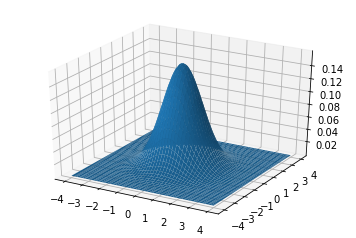

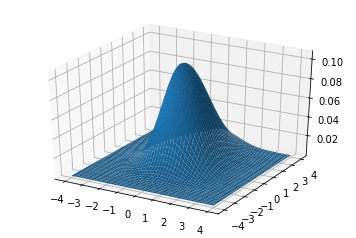

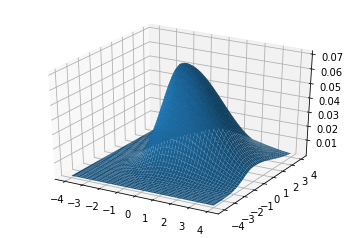

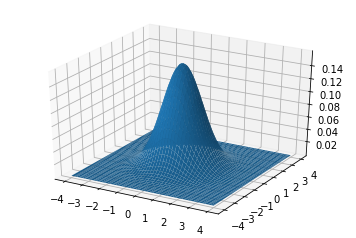

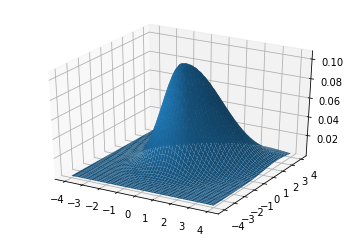

In [40]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

def SN(x, m, sigma, tau):
    c = np.math.sqrt(2 / np.math.pi) / (sigma * (1 + tau))
    if x > m:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2 * tau**2))
    else:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2))

def SN2d(x, m, W, sigma, tau):
    Z = []
    detW = W[0][0] * W[1][1] - W[0][1] * W[1][0]
    for i in range(0,x[0][0].size):
        y = []
        for j in range(0,x[1][i].size):
            x1 = SN(W[0][0] * (x[0][i][j] - m[0]) + W[1][0] * (x[1][i][j] - m[1]), 0, sigma[0], tau[0])
            x2 = SN(W[0][1] * (x[0][i][j] - m[0]) + W[1][1] * (x[1][i][j] - m[1]), 0, sigma[1], tau[1])
            y.append(detW * x1 * x2)
        Z.append(y)
    return Z

axX = np.linspace(-4, 4, 400)
axY = np.linspace(-4, 4, 400)

X, Y = np.meshgrid(axX,axY)
Z = SN2d((X,Y), [0,0], [[1,0],[0,1]], [1,1], [1,1])
pl = plt.figure()
ax = pl.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, np.array(Z))

plt.show()

Z = SN2d((X,Y), [0,0], [[1,0],[0,1]], [1,1], [1,2])
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, np.array(Z))
plt.show()

Z = SN2d((X,Y), [0,0], [[1,0],[0,1]], [1,1], [2,2])
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, np.array(Z))
plt.show()

Z = SN2d((X,Y), [0,0], [[np.cos(np.pi/4),-np.sin(np.pi/4)],[np.sin(np.pi/4),np.cos(np.pi/4)]], [1,1], [1,1])
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, np.array(Z))
plt.show()

Z = SN2d((X,Y), [0,0], [[np.cos(np.pi/4),-np.sin(np.pi/4)],[np.sin(np.pi/4),np.cos(np.pi/4)]], [1,1], [2,1])
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, np.array(Z))
plt.show()

## Zadanie
Wylosuj próbkę z dwuwymiarowego rozkładu normalnego Split normal distribution (2d). Narysuj próbkę i poziomice rozkładu dla parametrów:

* $m=[0,0]$  
  
  $W = \begin{bmatrix}
  \cos(\pi/4) & \sin(\pi/4) \\
  -\sin(\pi/4) & \cos(\pi/4) 
  \end{bmatrix}
  $
  
  $\sigma=[1,1]$
  
  $\tau=[2,1]$   



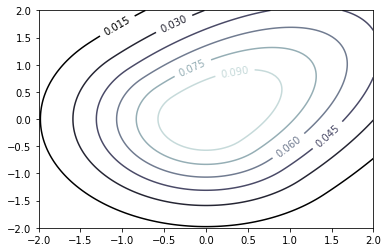

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def SN(x, m, sigma, tau):
    c = np.math.sqrt(2 / np.math.pi) / (sigma * (1 + tau))
    if x > m:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2 * tau**2))
    else:
        return c * np.exp((-1)*(x-m)**2 / (2 * sigma**2))

def SN2d(x, m, W, sigma, tau):
    Z = []
    detW = W[0][0] * W[1][1] - W[0][1] * W[1][0]
    for i in range(0,x[0][0].size):
        y = []
        for j in range(0,x[1][i].size):
            x1 = SN(W[0][0] * (x[0][i][j] - m[0]) + W[1][0] * (x[1][i][j] - m[1]), 0, sigma[0], tau[0])
            x2 = SN(W[0][1] * (x[0][i][j] - m[0]) + W[1][1] * (x[1][i][j] - m[1]), 0, sigma[1], tau[1])
            y.append(detW * x1 * x2)
        Z.append(y)
    return Z

axX = np.linspace(-2, 2, 100)
axY = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(axX,axY)
Z = SN2d((X,Y), [0,0], [[np.cos(np.pi/4),-np.sin(np.pi/4)],[np.sin(np.pi/4),np.cos(np.pi/4)]], [1,1], [2,1])

plt.figure()
CS = plt.contour(X, Y, Z, cmap=plt.cm.bone)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

## Zadanie

Napisz program znajdujący minimum i maksimum funkcji metodą gradientową (można użyć wbudowanych narzędzi).

$$
f(x_1,x_2)=100 (x_2 - x_1 x_2)^2 + (1 - x_1)^2 
$$


In [30]:
import scipy.optimize as sc

def f(x):
    return 100*(x[1]-x[0]*x[1])**2 + (1-x[0])**2

def fodw(x):
    return -f(x)

print(sc.minimize(f, [0, 0], method="CG").x)
print(sc.minimize(fodw, [0, 0], method="CG").x)

[  1.01000000e+00  -7.52508646e-07]
[ -3.79052969e+14   2.82416471e+08]
